In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('..')))
    
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import imagehash


from utils.visualization import data_count_plot

from utils import data

### Loading Dataframe

In [2]:
base_path = '../data/raw/Furniture_Data'
df = data.load(base_path)

Loading beds...
Loading beds/Asian...
Loading beds/Beach...
Loading beds/Contemporary...
Loading beds/Craftsman...
Loading beds/Eclectic...
Loading beds/Farmhouse...
Loading beds/Industrial...
Loading beds/Mediterranean...
Loading beds/Midcentury...
Loading beds/Modern...
Loading beds/Rustic...
Loading beds/Scandinavian...
Loading beds/Southwestern...
Loading beds/Traditional...
Loading beds/Transitional...
Loading beds/Tropical...
Loading beds/Victorian...
Loading chairs...
Loading chairs/Asian...
Loading chairs/Beach...
Loading chairs/Contemporary...
Loading chairs/Craftsman...
Loading chairs/Eclectic...
Loading chairs/Farmhouse...
Loading chairs/Industrial...
Loading chairs/Mediterranean...
Loading chairs/Midcentury...
Loading chairs/Modern...
Loading chairs/Rustic...
Loading chairs/Scandinavian...
Loading chairs/Southwestern...
Loading chairs/Traditional...
Loading chairs/Transitional...
Loading chairs/Tropical...
Loading chairs/Victorian...
Loading dressers...
Loading dressers/Asi

In [3]:
df.describe()

,Width,Height,Ratio
count,90083.000000,90083.000000,90083.000000
mean,340.858297,340.857698,1.000001
std,32.691822,32.689399,0.000403
min,224.000000,224.000000,1.000000
25%,350.000000,350.000000,1.000000
50%,350.000000,350.000000,1.000000
75%,350.000000,350.000000,1.000000
max,500.000000,446.000000,1.121076


In [4]:
df.head()

,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian


### Histogram Plot

In [5]:
def plot_histogram(df, column_name, bins=20, title=None):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    plt.title(title or f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

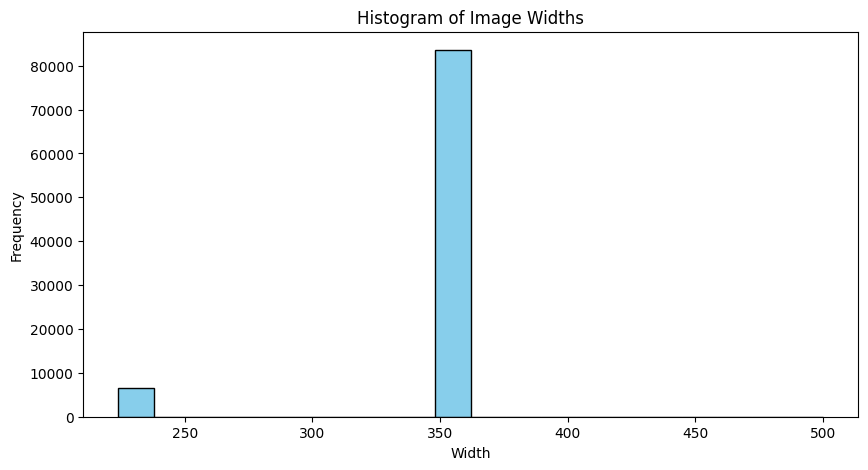

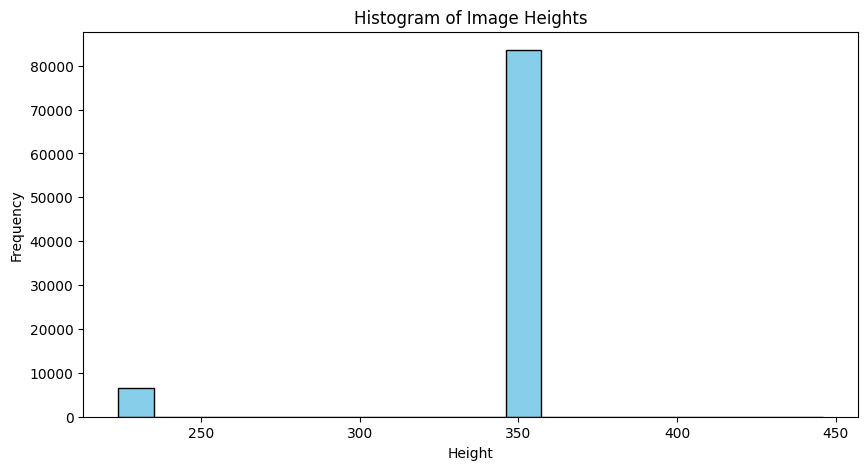

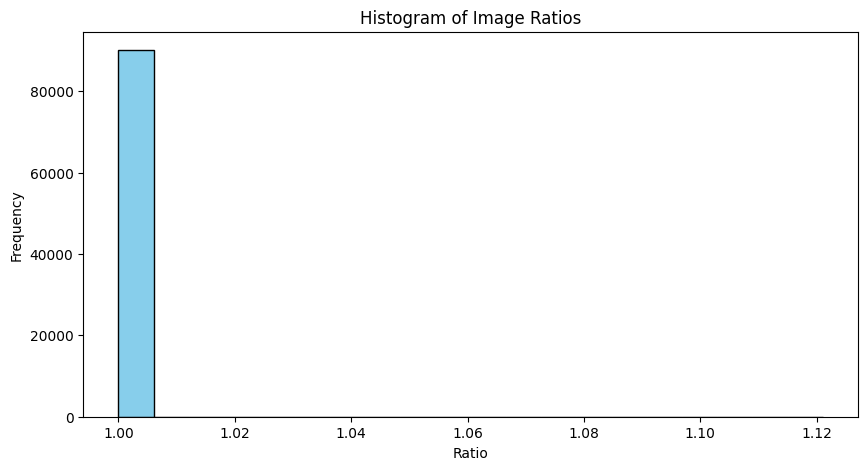

In [6]:
# Plot histograms for numerical columns
plot_histogram(df, 'Width', title='Histogram of Image Widths')
plot_histogram(df, 'Height', title='Histogram of Image Heights')
plot_histogram(df, 'Ratio', title='Histogram of Image Ratios')

d:\llm-examples\A2\Image-Classification-and-Recommendation\utils\visualization.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette=palette, saturation=1)
d:\llm-examples\A2\Image-Classification-and-Recommendation\utils\visualization.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, palette=palette, saturation=1)
d:\llm-examples\A2\Image-Classification-and-Recommendation\utils\visualization.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=ax, palette=palette, saturation=1

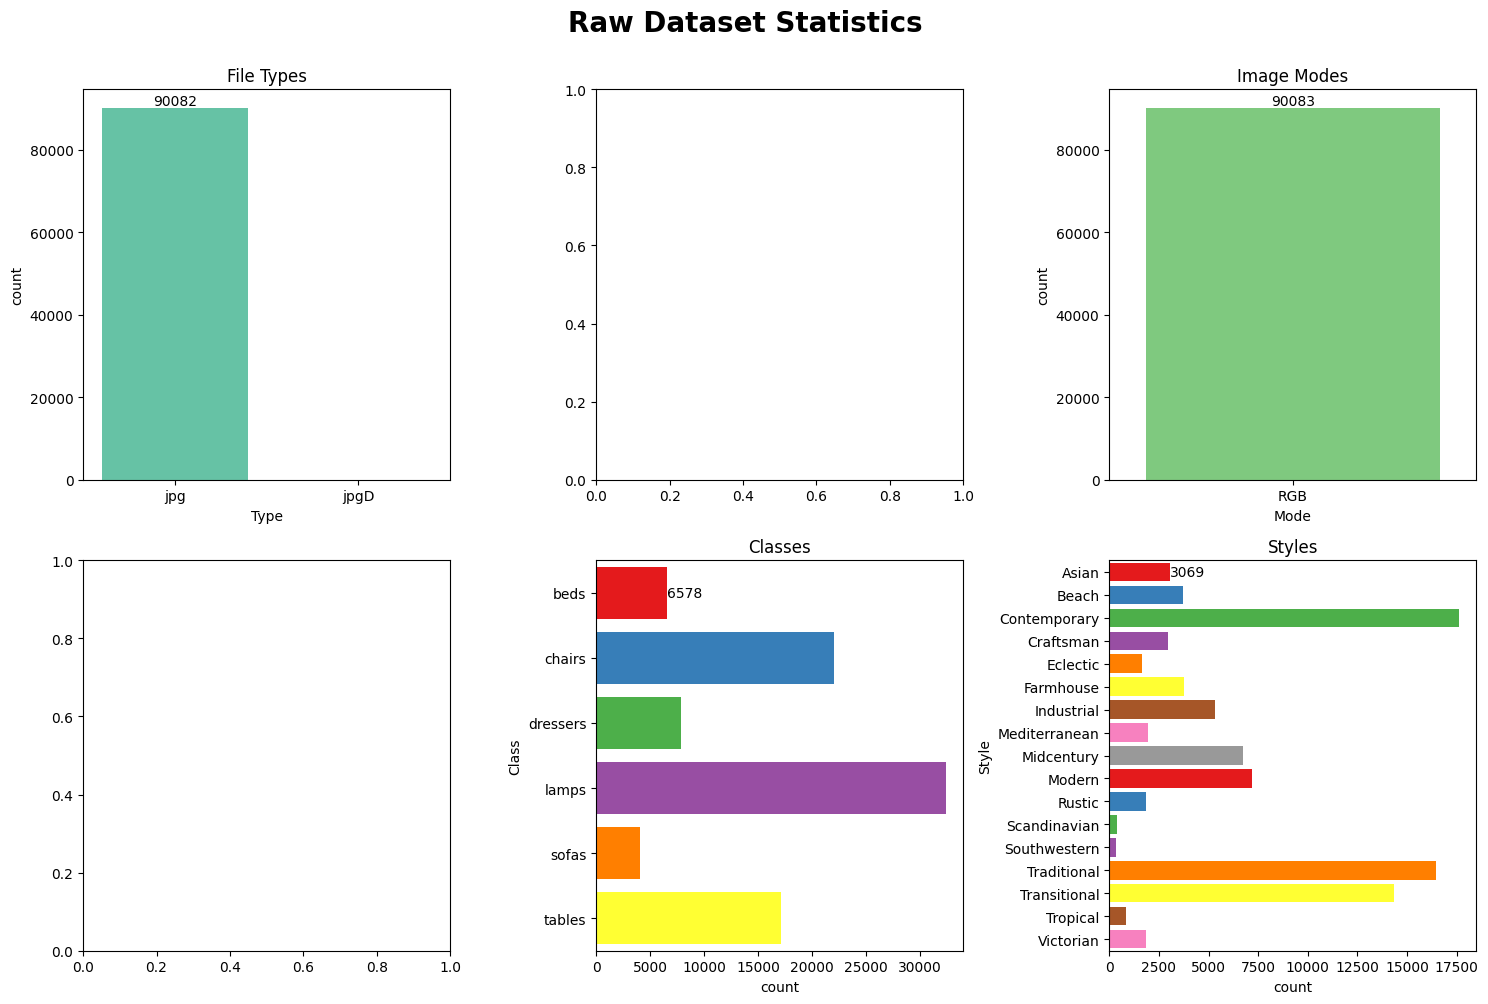

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

data_count_plot(df, 'Type', ax=ax[0][0], title='File Types', annotate=True, palette='Set2')
data_count_plot(df, 'Mode', ax=ax[0][2], title='Image Modes', annotate=True, palette='Accent')
data_count_plot(df, 'Class', ax=ax[1][1], horizontal=True, title='Classes', annotate=True, palette='Set1')
data_count_plot(df, 'Style', ax=ax[1][2], horizontal=True, title='Styles', annotate=True, palette='Set1')

fig.suptitle('Raw Dataset Statistics', fontsize=20, fontweight='bold', y=1.0)
fig.tight_layout()

In [11]:
def find_near_duplicates(df, threshold=5):
    image_hashes = {}
    duplicates = []
  
    for row in df:
        # Calculate perceptual hash of the image
        image = Image.open(base_path + '/' + row['Path'])
        image_hash = imagehash.phash(image)

        print(image_hash)

        # Check if a similar hash already exists
        # is_duplicate = False
        # for existing_hash, paths in image_hashes.items():
        #     if image_hash - existing_hash <= threshold:
        #         paths.append(file_path)
        #         duplicates.append(paths)
        #         is_duplicate = True
        #         break

        # If the image is not a duplicate, add its hash to the dictionary
    #     if not is_duplicate:
    #         image_hashes[image_hash] = [file_path]

    # print(f"Duplicates found so far: {len(duplicates)}")
    # print("------------------------------------")

    return duplicates

duplicates = find_near_duplicates(df, 1)

TypeError: string indices must be integers, not 'str'